In [1]:
# import the required packages
import lux
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc 
from scipy.spatial.distance import cdist
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

# 1. Build Clustering Models using Numerical Data

## 1.1 Data exploration and manipulation

The first persona is a person that wants a family-car friendly.

### Data Extraction and filtering

In [2]:
data = pd.read_csv('Used_Car_Price.csv')
pd.set_option("display.float_format", "{:.6f}".format)
data = data[data['YEAR'] >= 2016]
data = data[data['PRICE'] <= 200000]
data = data[data['HEIGHT'] >= 1500]
data = data[data['ENGINE CAPACITY '] <= 3000]
data = data[data['FUEL TANK CAPACITY'] <= 85]
data = data[data['SEATING CAPACITY'] >= 3]
data = data[data['KILOMETER'] <= 150000]
data = data.drop(["MODEL", "MAX POWER", "MAX TORQUE"], axis=1)
data['VOLUME(m3)'] = (data['LENGTH'] * data['WIDTH'] * data['HEIGHT']) / (1000000000)
data.head()

C:\Anaconda\lib\site-packages\lux\executor\PandasExecutor.py:448: UserWarning:
Lux detects that the attribute 'YEAR' may be temporal.
To display visualizations for these attributes accurately, please convert temporal attributes to Datetime objects.
For example, you can convert a Year attribute (e.g., 1998, 1971, 1982) using pd.to_datetime by specifying the `format` as '%Y'.

Here is a starter template that you can use for converting the temporal fields:
	df['YEAR'] = pd.to_datetime(df['YEAR'], format='<replace-with-datetime-format>')

See more at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
If YEAR is not a temporal attribute, please use override Lux's automatically detected type:
	df.set_data_type({'YEAR':'quantitative'})
C:\Anaconda\lib\site-packages\lux\executor\PandasExecutor.py:448: UserWarning:
Lux detects that the attribute 'YEAR' may be temporal.
To display visualizations for these attributes accurately, please convert temporal attributes 

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

price(1),Year(2), kilometer(3),  Engine cap(9), FUEL TANK CAPACITY(15), VOLUME(cm3)(16)

### Data exploration

In [3]:
data.describe() 

C:\Anaconda\lib\site-packages\lux\executor\PandasExecutor.py:448: UserWarning:
Lux detects that the attribute 'YEAR' may be temporal.
To display visualizations for these attributes accurately, please convert temporal attributes to Datetime objects.
For example, you can convert a Year attribute (e.g., 1998, 1971, 1982) using pd.to_datetime by specifying the `format` as '%Y'.

Here is a starter template that you can use for converting the temporal fields:
	df['YEAR'] = pd.to_datetime(df['YEAR'], format='<replace-with-datetime-format>')

See more at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
If YEAR is not a temporal attribute, please use override Lux's automatically detected type:
	df.set_data_type({'YEAR':'quantitative'})


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [4]:
data.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 843 entries, 0 to 2054
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MAKE                843 non-null    object 
 1   PRICE               843 non-null    int64  
 2   YEAR                843 non-null    int64  
 3   KILOMETER           843 non-null    int64  
 4   FUEL TYPE           843 non-null    object 
 5   TRANSMISSION        843 non-null    object 
 6   COLOR               843 non-null    object 
 7   OWNER               843 non-null    object 
 8   SELLER TYPE         843 non-null    object 
 9   ENGINE CAPACITY     843 non-null    float64
 10  DRIVETRAIN          840 non-null    object 
 11  LENGTH              843 non-null    float64
 12  WIDTH               843 non-null    float64
 13  HEIGHT              843 non-null    float64
 14  SEATING CAPACITY    843 non-null    float64
 15  FUEL TANK CAPACITY  843 non-null    float64
 16  VOLUME(

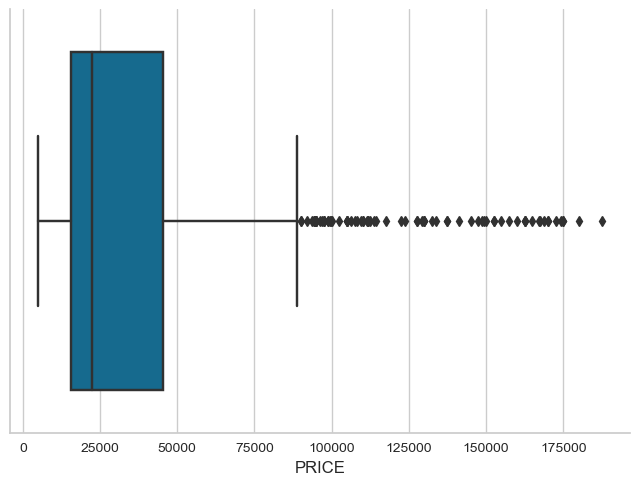

In [5]:
sns.boxplot(x=data['PRICE'])
sns.despine()

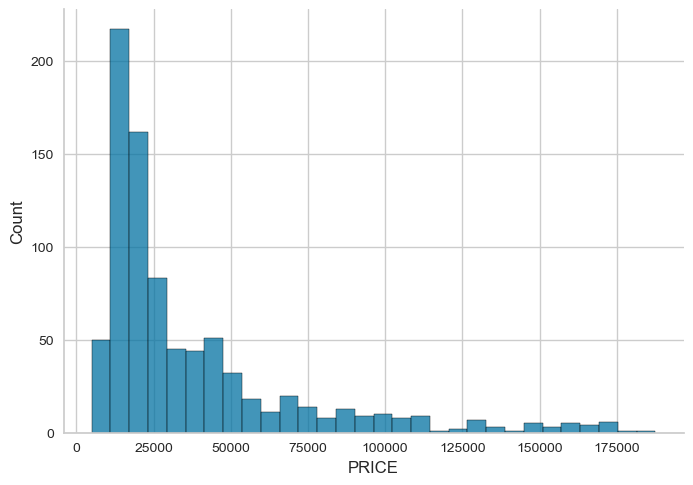

In [6]:
sns.histplot(x=data['PRICE'])
sns.despine()

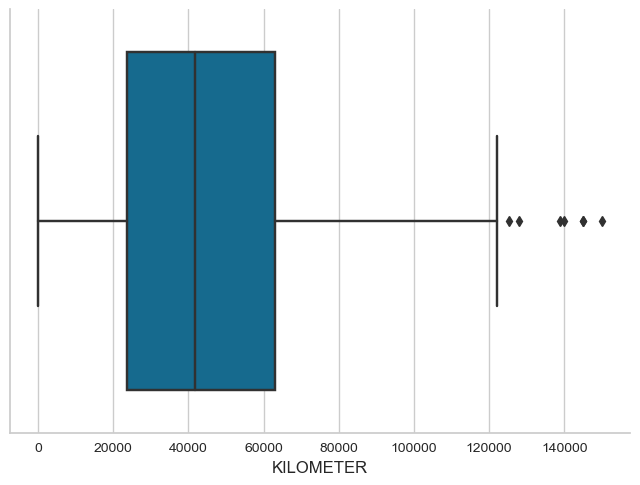

In [7]:
sns.boxplot(x=data['KILOMETER'])
sns.despine()

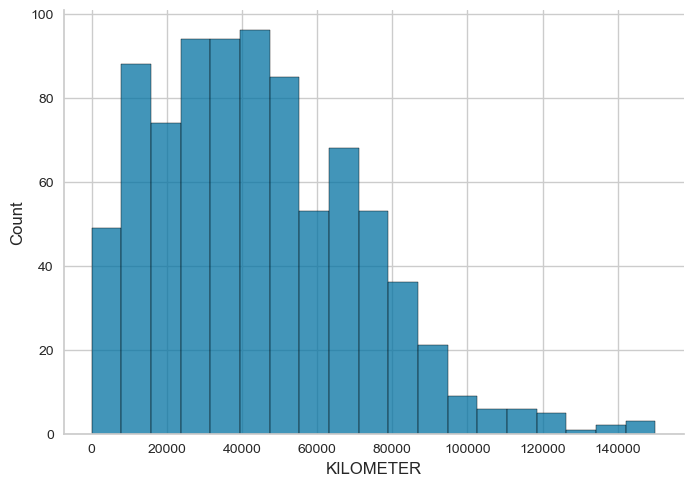

In [8]:
sns.histplot(x=data['KILOMETER'])
sns.despine()

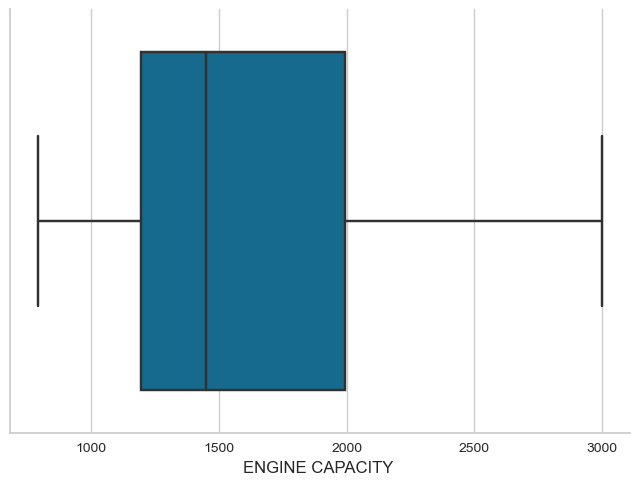

In [9]:
sns.boxplot(x=data['ENGINE CAPACITY '])
sns.despine()

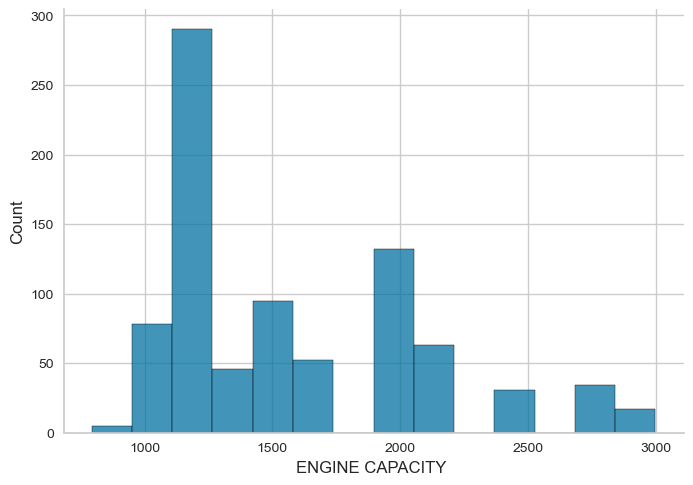

In [10]:
sns.histplot(x=data['ENGINE CAPACITY '])
sns.despine()

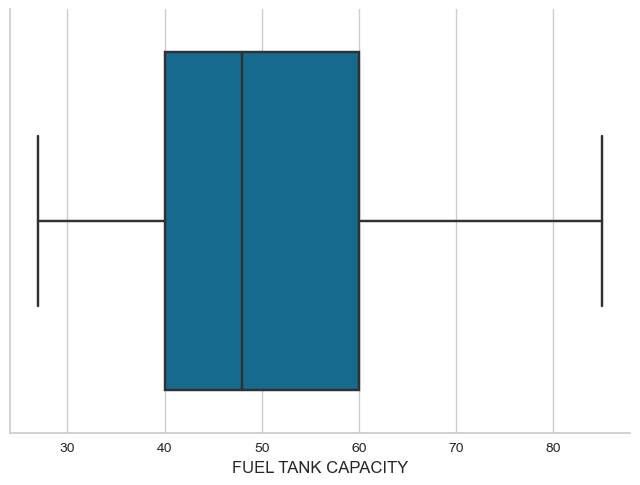

In [11]:
sns.boxplot(x=data['FUEL TANK CAPACITY'])
sns.despine()

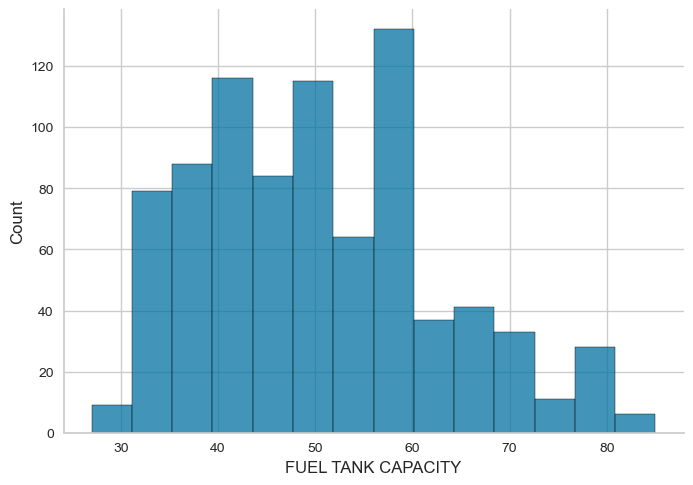

In [12]:
sns.histplot(x=data['FUEL TANK CAPACITY'])
sns.despine()

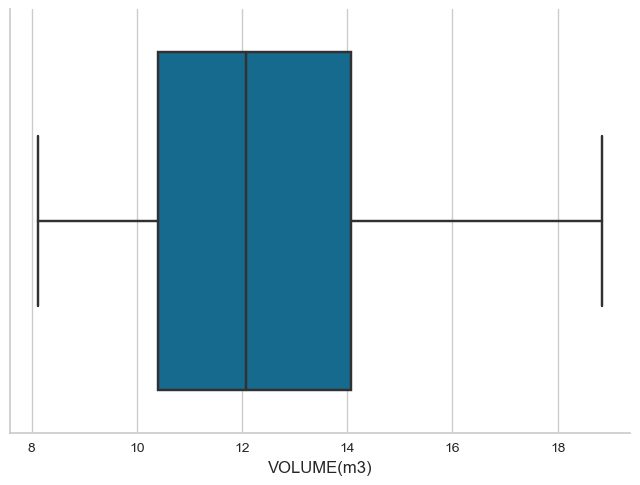

In [13]:
sns.boxplot(x=data['VOLUME(m3)'])
sns.despine()

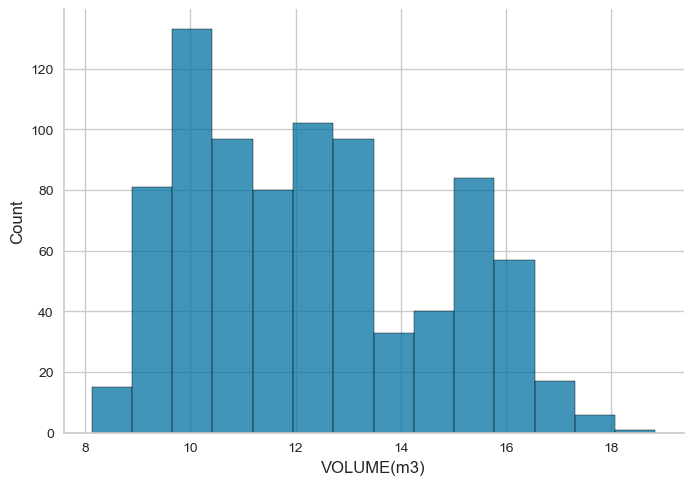

In [14]:
sns.histplot(x=data['VOLUME(m3)'])
sns.despine()

In [15]:
data.set_intent(['PRICE','KILOMETER'])
data

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [16]:
data.set_intent(['PRICE','ENGINE CAPACITY '])
data

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [17]:
data.set_intent(['PRICE','FUEL TANK CAPACITY'])
data

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [18]:
data.set_intent(['PRICE','VOLUME(m3)'])
data

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [19]:
data_num = data.select_dtypes(['float64', 'int64']).copy()
data_cat = data.select_dtypes(['object']).copy()
data_num = data_num.drop(['LENGTH', 'WIDTH', 'HEIGHT', 'SEATING CAPACITY'], axis=1)
data_num.describe()

C:\Anaconda\lib\site-packages\lux\executor\PandasExecutor.py:448: UserWarning:
Lux detects that the attribute 'YEAR' may be temporal.
To display visualizations for these attributes accurately, please convert temporal attributes to Datetime objects.
For example, you can convert a Year attribute (e.g., 1998, 1971, 1982) using pd.to_datetime by specifying the `format` as '%Y'.

Here is a starter template that you can use for converting the temporal fields:
	df['YEAR'] = pd.to_datetime(df['YEAR'], format='<replace-with-datetime-format>')

See more at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
If YEAR is not a temporal attribute, please use override Lux's automatically detected type:
	df.set_data_type({'YEAR':'quantitative'})


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### Data scaling

In [20]:
scaler = StandardScaler()
data_num_scaled = scaler.fit_transform(data_num)
data_num_scaled.shape

(843, 6)

In [21]:
data_ori = scaler.inverse_transform(data_num_scaled)
data_ori

array([[1.26250000e+04, 2.01700000e+03, 8.71500000e+04, 1.19800000e+03,
        3.50000000e+01, 1.00883160e+01],
       [1.99750000e+04, 2.01900000e+03, 3.75000000e+04, 1.19700000e+03,
        3.70000000e+01, 1.05266253e+01],
       [4.87500000e+04, 2.01800000e+03, 6.90000000e+04, 2.39300000e+03,
        5.50000000e+01, 1.55537647e+01],
       ...,
       [2.22750000e+04, 2.01600000e+03, 4.70000000e+04, 1.59100000e+03,
        6.00000000e+01, 1.23889780e+01],
       [2.31250000e+04, 2.02100000e+03, 4.80000000e+04, 1.46200000e+03,
        4.80000000e+01, 1.17277220e+01],
       [2.12500000e+04, 2.01600000e+03, 9.03000000e+04, 2.17900000e+03,
        7.00000000e+01, 1.54681852e+01]])

In [22]:
data_num_scaledP1 = scaler.fit_transform(data_num)
data_num_scaledP1.shape

(843, 6)

In [23]:
data_oriP1 = scaler.inverse_transform(data_num_scaledP1)
data_oriP1

array([[1.26250000e+04, 2.01700000e+03, 8.71500000e+04, 1.19800000e+03,
        3.50000000e+01, 1.00883160e+01],
       [1.99750000e+04, 2.01900000e+03, 3.75000000e+04, 1.19700000e+03,
        3.70000000e+01, 1.05266253e+01],
       [4.87500000e+04, 2.01800000e+03, 6.90000000e+04, 2.39300000e+03,
        5.50000000e+01, 1.55537647e+01],
       ...,
       [2.22750000e+04, 2.01600000e+03, 4.70000000e+04, 1.59100000e+03,
        6.00000000e+01, 1.23889780e+01],
       [2.31250000e+04, 2.02100000e+03, 4.80000000e+04, 1.46200000e+03,
        4.80000000e+01, 1.17277220e+01],
       [2.12500000e+04, 2.01600000e+03, 9.03000000e+04, 2.17900000e+03,
        7.00000000e+01, 1.54681852e+01]])

After exploring the data, I have decided to use PRICE, KILOMETER, ENGINE CAPACITY, FUEL TANK CAPACITY and VOLUME(m3) as my variables for K-means clustering and Hierarchical clustering.

In [24]:
# Persona 1(Reseller) PRICE (0), VOLUME (5), ENGINE CAPACITY(3)
data_var_P13 = data_num_scaledP1[:, [0, 5, 3]]
data_var_P13

array([[-0.7134848 , -0.96099192, -0.76856348],
       [-0.50009414, -0.77425645, -0.77053563],
       [ 0.335323  ,  1.36748538,  1.58815724],
       ...,
       [-0.43331884,  0.01917265,  0.00649196],
       [-0.40864101, -0.26254613, -0.24791555],
       [-0.4630774 ,  1.33102545,  1.16611688]])

In [25]:
# Persona 1(Reseller) PRICE (0), VOLUME (5), ENGINE CAPACITY(3), FUEL TANK CAPACITY(4)
data_var_P14 = data_num_scaledP1[:, [0, 5, 3, 4]]
data_var_P14

array([[-0.7134848 , -0.96099192, -0.76856348, -1.26190829],
       [-0.50009414, -0.77425645, -0.77053563, -1.10095377],
       [ 0.335323  ,  1.36748538,  1.58815724,  0.34763695],
       ...,
       [-0.43331884,  0.01917265,  0.00649196,  0.75002326],
       [-0.40864101, -0.26254613, -0.24791555, -0.21570388],
       [-0.4630774 ,  1.33102545,  1.16611688,  1.55479589]])

In [26]:
# Persona 1(Family) PRICE (0), VOLUME (5), ENGINE CAPACITY(3), FUEL TANK CAPACITY(4), KILOMETER(2)
data_var_P15 = data_num_scaledP1[:, [0, 5, 3, 4, 2]]
data_var_P15

array([[-0.7134848 , -0.96099192, -0.76856348, -1.26190829,  1.58221381],
       [-0.50009414, -0.77425645, -0.77053563, -1.10095377, -0.24950124],
       [ 0.335323  ,  1.36748538,  1.58815724,  0.34763695,  0.91261404],
       ...,
       [-0.43331884,  0.01917265,  0.00649196,  0.75002326,  0.10097797],
       [-0.40864101, -0.26254613, -0.24791555, -0.21570388,  0.13787052],
       [-0.4630774 ,  1.33102545,  1.16611688,  1.55479589,  1.69842534]])

## 1.2 K-Means Clustering

### K-Means Clustering for 3 variable

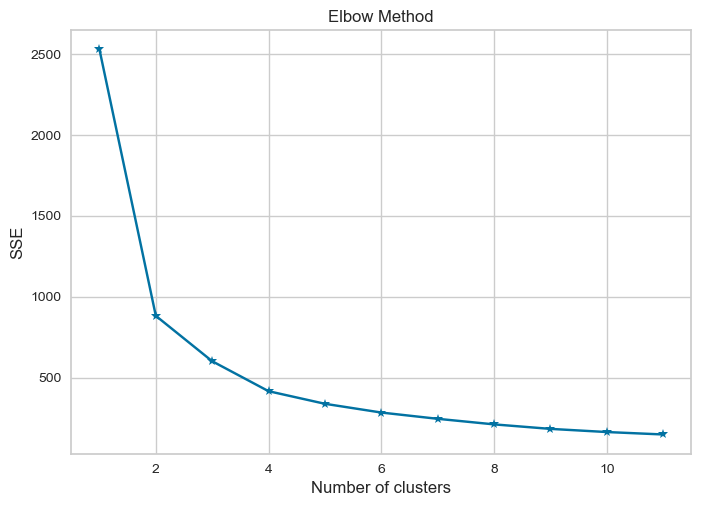

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly

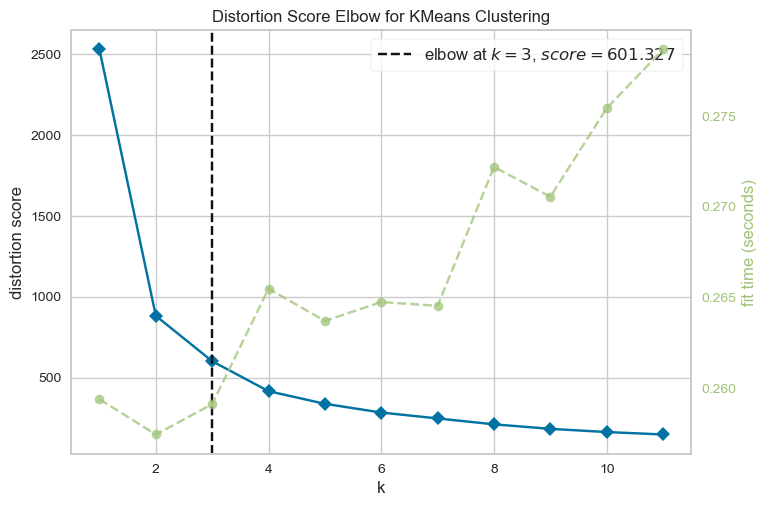

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
sse = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, n_init=20, random_state=1)
    kmeans.fit(data_var_P13)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 12), sse, 'b-*')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

#Add yellow brick
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(data_var_P13)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

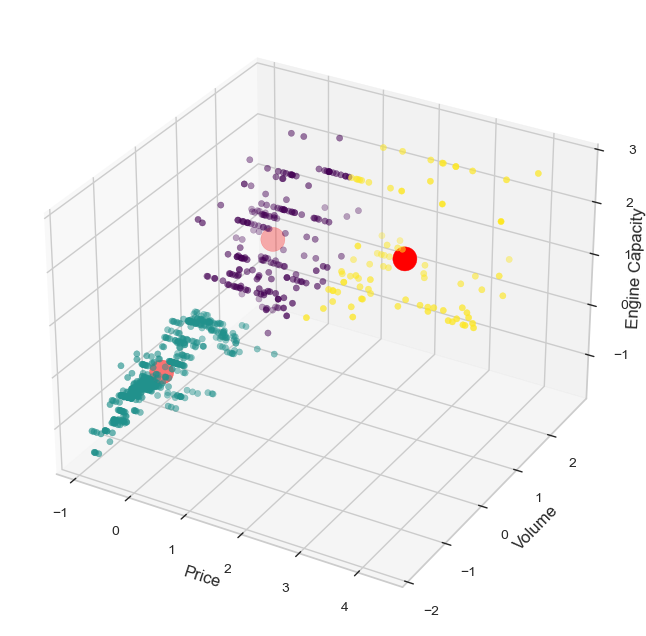

In [28]:
# Build the model using the optimal n_cluster
kmeans_P13var = KMeans(n_clusters=3, n_init=20, random_state=1)
# Fit the model and assign each data point to the cluster
kmeans_P13var_pred = kmeans_P13var.fit_predict(data_var_P13) # fit and then predict

plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(data_var_P13[:,0], data_var_P13[:,1], data_var_P13[:,2], c=kmeans_P13var_pred, cmap = 'viridis')
ax.scatter3D(kmeans_P13var.cluster_centers_[:,0], kmeans_P13var.cluster_centers_[:,1], kmeans_P13var.cluster_centers_[:,2],
             s=300, c="red")
ax.set_xlabel('Price')
ax.set_ylabel('Volume')
ax.set_zlabel('Engine Capacity')
ax.zaxis.labelpad=-1.3

plt.show()

In [29]:
ssP13 = silhouette_score(data_var_P13, kmeans_P13var.fit_predict(data_var_P13))
ssP13

0.5746324216322596

PRICE


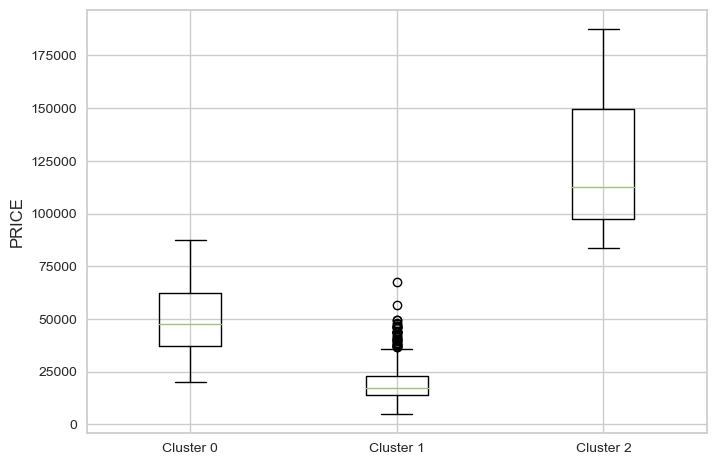

VOLUME(m2)


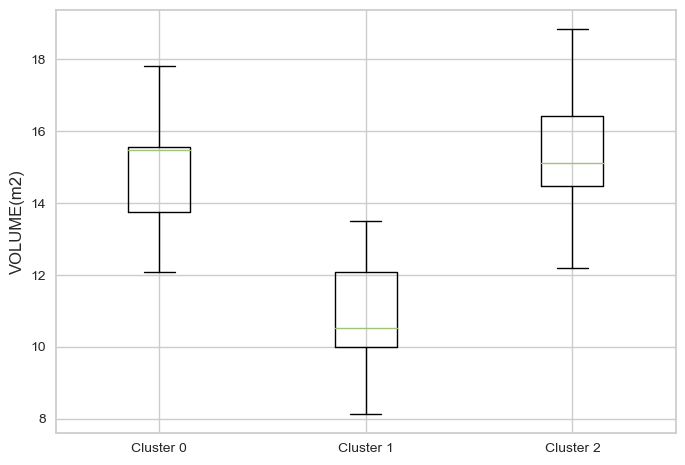

ENGINE CAPACITY 


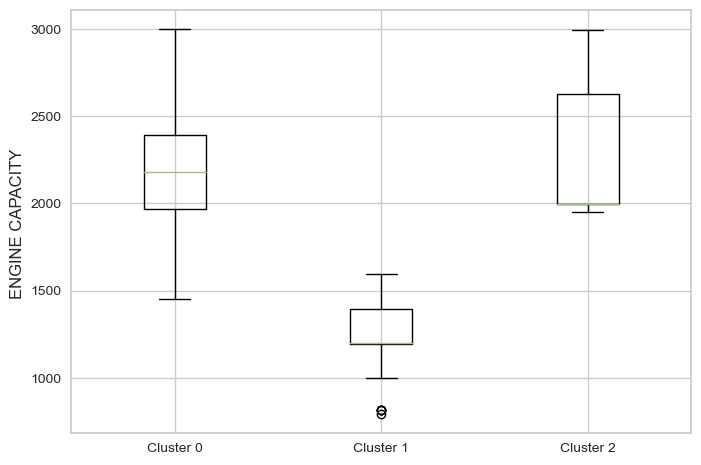

In [30]:
bp_data_var_P13 = pd.DataFrame(data_oriP1[:, [0, 5, 3]], columns=['PRICE', 'VOLUME(m2)', 'ENGINE CAPACITY '])
bp_data_var_P13['Cluster'] = kmeans_P13var_pred
for col in range(len(bp_data_var_P13.columns) - 1):
    print(bp_data_var_P13.columns[col])
    plt.cla()
    plt.boxplot([bp_data_var_P13.iloc[:,col][bp_data_var_P13.Cluster==0].tolist(),
                 bp_data_var_P13.iloc[:,col][bp_data_var_P13.Cluster==1].tolist(),
                 bp_data_var_P13.iloc[:,col][bp_data_var_P13.Cluster==2].tolist(),],
                 labels=('Cluster 0','Cluster 1','Cluster 2')) 
    plt.ylabel(bp_data_var_P13.columns[col])
    plt.show()

### K-Means Clustering for 4 variable

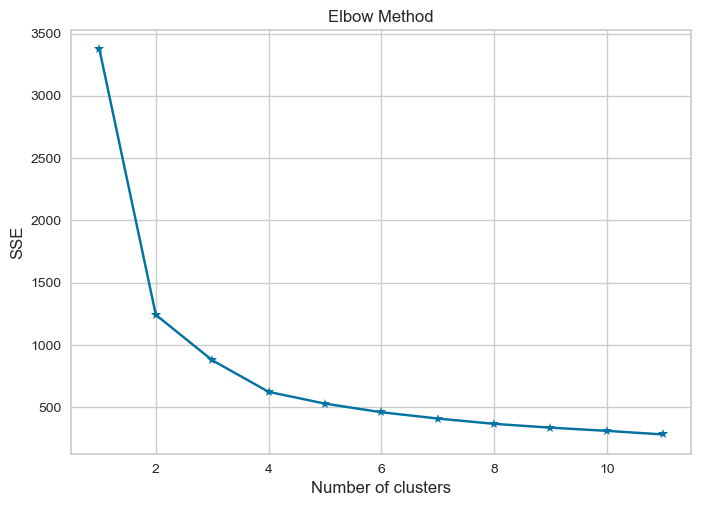

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly

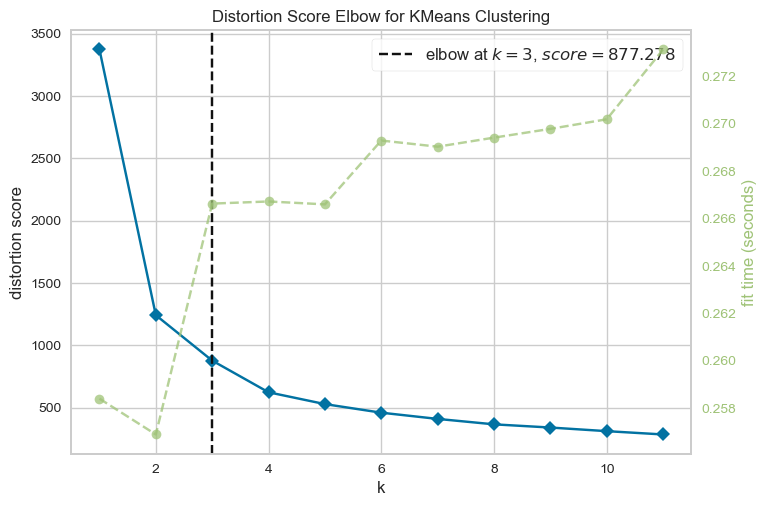

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
sse = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, n_init=20, random_state=1)
    kmeans.fit(data_var_P14)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 12), sse, 'b-*')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

#Add yellow brick
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(data_var_P14)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

From this graph, we can see that the optimal number of cluster is 3

In [32]:
kmeans_P14var = KMeans(n_clusters=3, n_init=20, random_state=1)
kmeans_P14var_pred = kmeans_P14var.fit_predict(data_var_P14) 
ssP14 = silhouette_score(data_var_P14, kmeans_P14var.fit_predict(data_var_P14))
ssP14

0.4897857803963321

PRICE


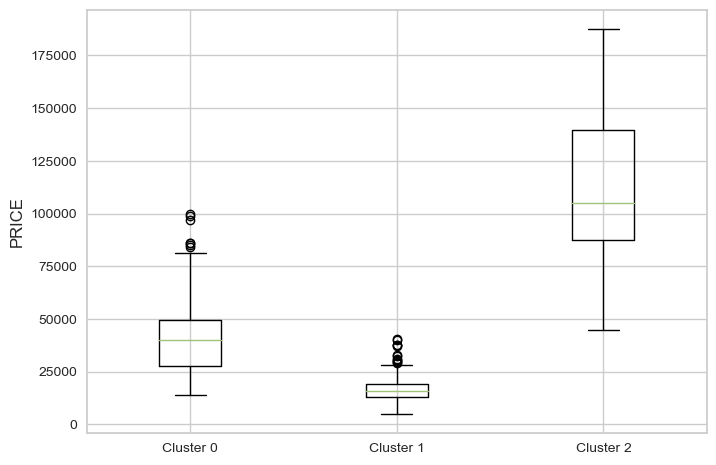

VOLUME(m2)


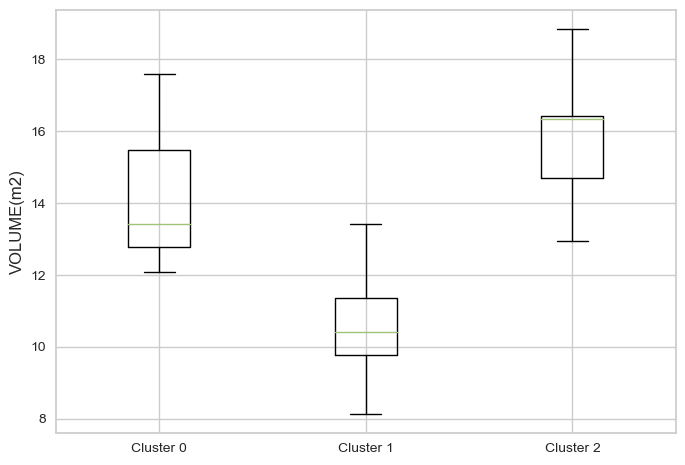

ENGINE CAPACITY 


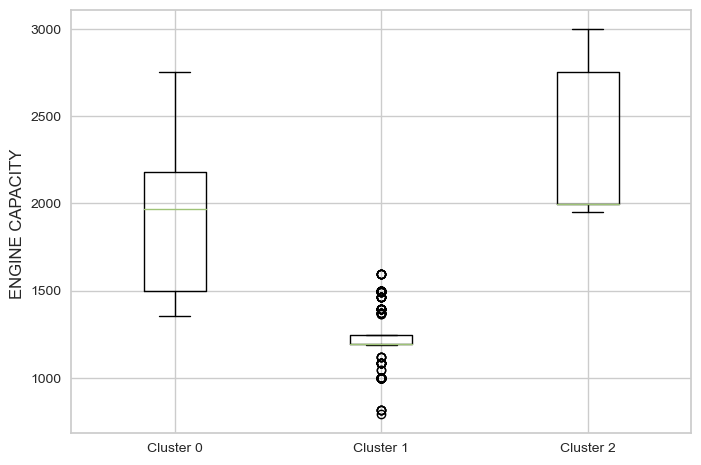

FUEL TANK CAPACITY


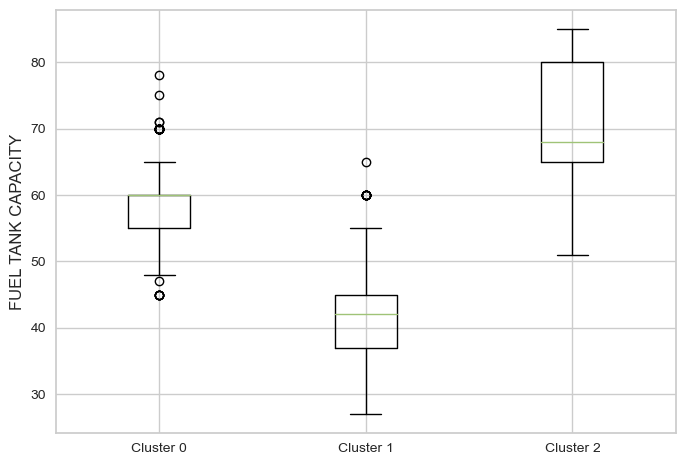

In [33]:
bp_data_var_P14 = pd.DataFrame(data_oriP1[:, [0, 5, 3, 4]], columns=['PRICE', 'VOLUME(m2)', 'ENGINE CAPACITY ', 
                                                                     'FUEL TANK CAPACITY'])
bp_data_var_P14['Cluster'] = kmeans_P14var_pred
for col in range(len(bp_data_var_P14.columns) - 1):
    print(bp_data_var_P14.columns[col])
    plt.cla()
    plt.boxplot([bp_data_var_P14.iloc[:,col][bp_data_var_P14.Cluster==0].tolist(),
                 bp_data_var_P14.iloc[:,col][bp_data_var_P14.Cluster==1].tolist(),
                 bp_data_var_P14.iloc[:,col][bp_data_var_P14.Cluster==2].tolist(),],
                 labels=('Cluster 0','Cluster 1','Cluster 2')) 
    plt.ylabel(bp_data_var_P14.columns[col])
    plt.show()


### K-Means Clustering for 5 variable

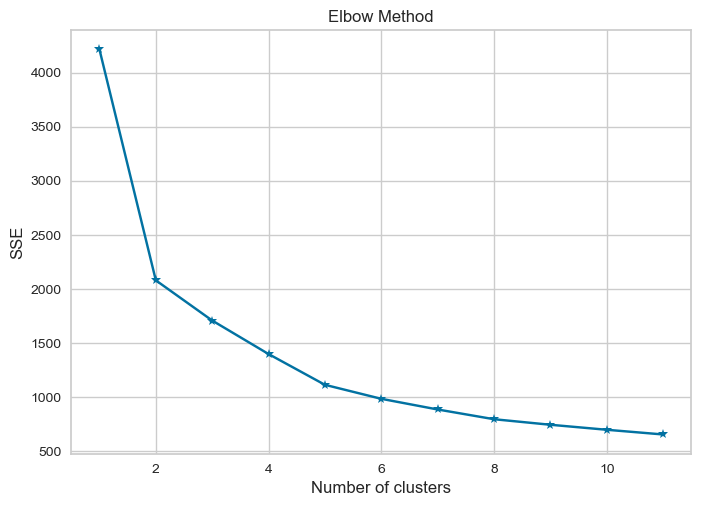

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly

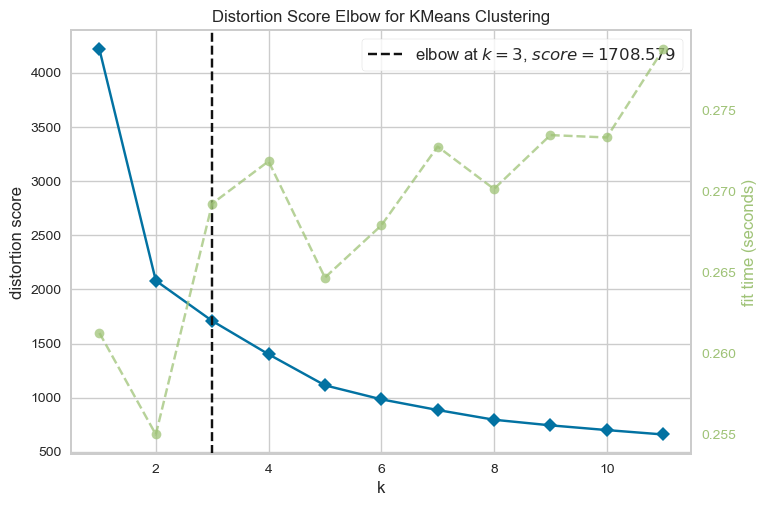

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
sse = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, n_init=20, random_state=1)
    kmeans.fit(data_var_P15)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 12), sse, 'b-*')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

#Add yellow brick
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(data_var_P15)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

From this graph, we can see that the optimal number of cluster is 3

In [35]:
kmeans_P15var = KMeans(n_clusters=3, n_init=20, random_state=1)
kmeans_P15var_pred = kmeans_P15var.fit_predict(data_var_P15) 
ssP15 = silhouette_score(data_var_P15, kmeans_P15var.fit_predict(data_var_P15))
ssP15

0.3767088989371512

PRICE


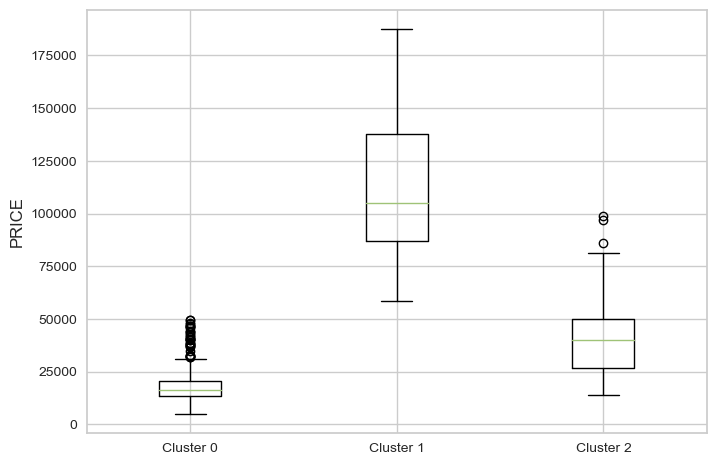

VOLUME(m2)


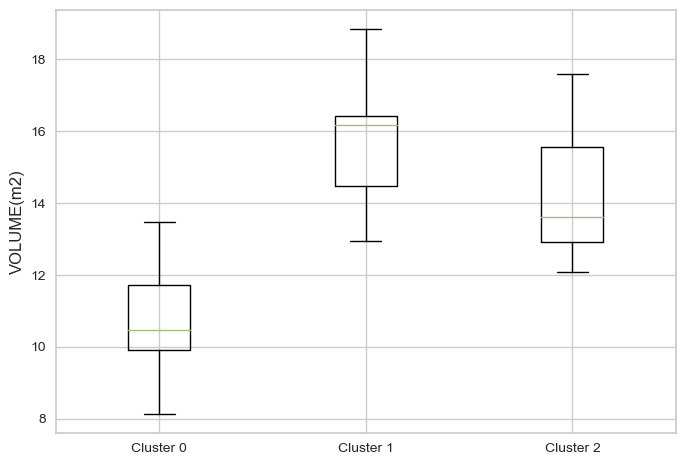

ENGINE CAPACITY 


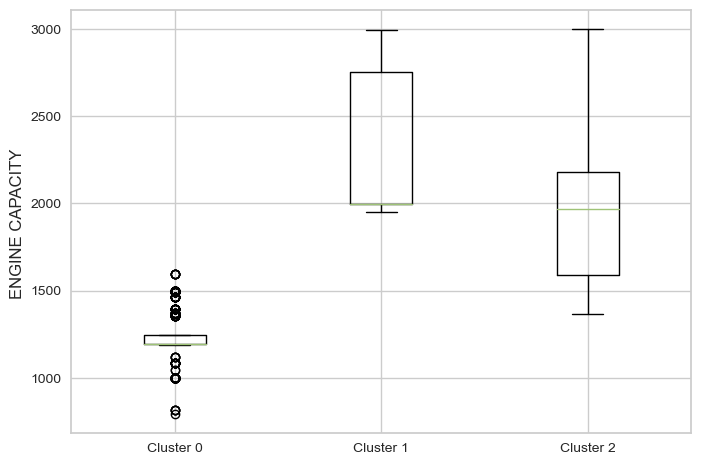

FUEL TANK CAPACITY


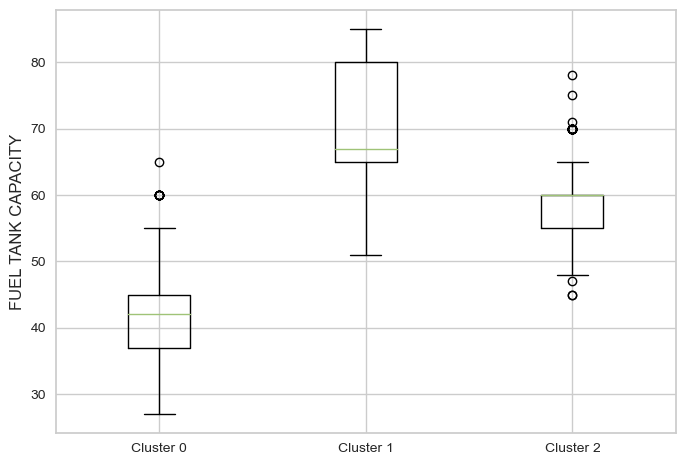

KILOMETER


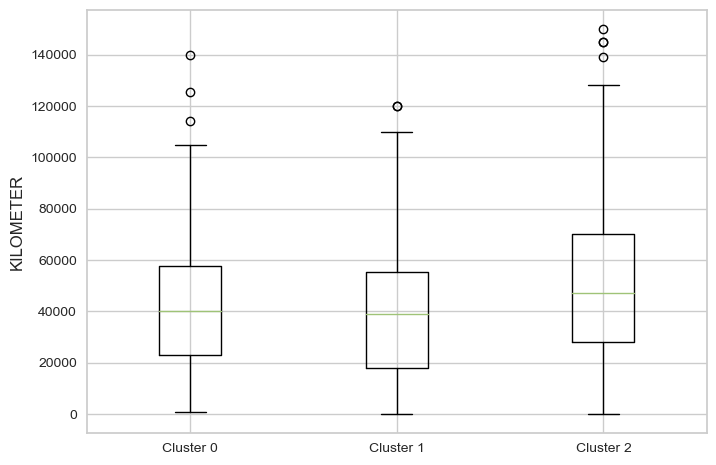

In [36]:
bp_data_var_P15 = pd.DataFrame(data_oriP1[:, [0, 5, 3, 4, 2]], columns=['PRICE', 'VOLUME(m2)', 'ENGINE CAPACITY ', 
                                                                        'FUEL TANK CAPACITY', 'KILOMETER'])
bp_data_var_P15['Cluster'] = kmeans_P15var_pred
for col in range(len(bp_data_var_P15.columns) - 1):
    print(bp_data_var_P15.columns[col])
    plt.cla()
    plt.boxplot([bp_data_var_P15.iloc[:,col][bp_data_var_P15.Cluster==0].tolist(),
                 bp_data_var_P15.iloc[:,col][bp_data_var_P15.Cluster==1].tolist(),
                 bp_data_var_P15.iloc[:,col][bp_data_var_P15.Cluster==2].tolist(),],
                 labels=('Cluster 0','Cluster 1','Cluster 2')) 
    plt.ylabel(bp_data_var_P15.columns[col])
    plt.show()


## 1.3 Hierarchical Clustering

###  Hierarchical Clustering for 3 variable

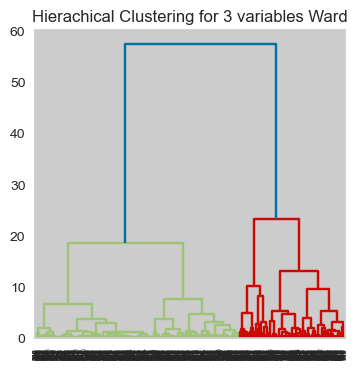

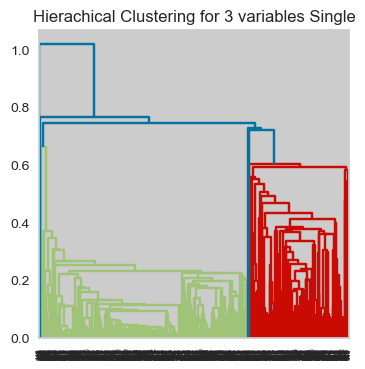

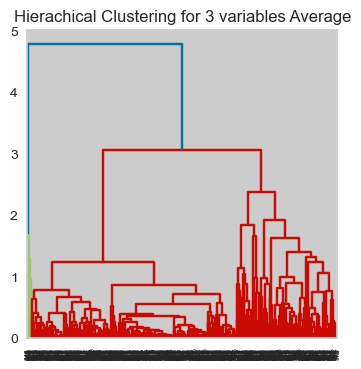

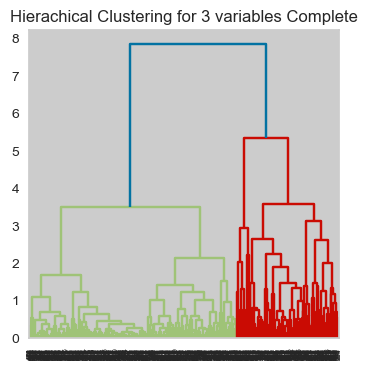

In [37]:
HClust_P13var = shc.linkage(data_var_P13, method='ward')
plt.figure(figsize=(4, 4))
plt.title('Hierachical Clustering for 3 variables Ward')
Dendrogram = shc.dendrogram(HClust_P13var)

HClust_P13var = shc.linkage(data_var_P13, method='single')
plt.figure(figsize=(4, 4))
plt.title('Hierachical Clustering for 3 variables Single')
Dendrogram = shc.dendrogram(HClust_P13var)

HClust_P13var = shc.linkage(data_var_P13, method='average')
plt.figure(figsize=(4, 4))
plt.title('Hierachical Clustering for 3 variables Average')
Dendrogram = shc.dendrogram(HClust_P13var)

HClust_P13var = shc.linkage(data_var_P13, method='complete')
plt.figure(figsize=(4, 4))
plt.title('Hierachical Clustering for 3 variables Complete')
Dendrogram = shc.dendrogram(HClust_P13var)

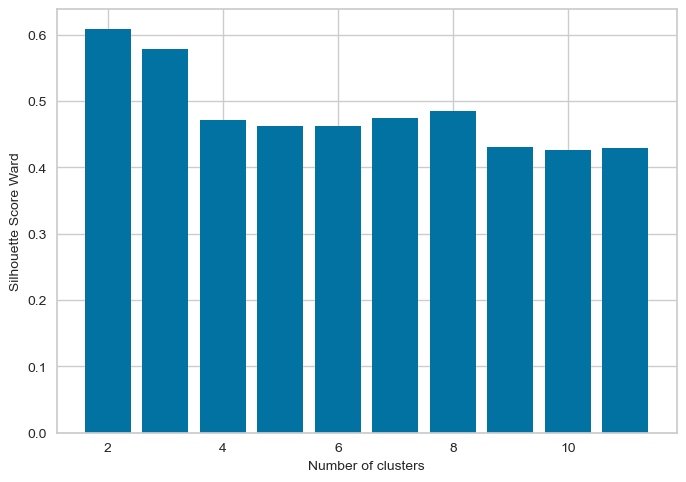

0.6077637763317943


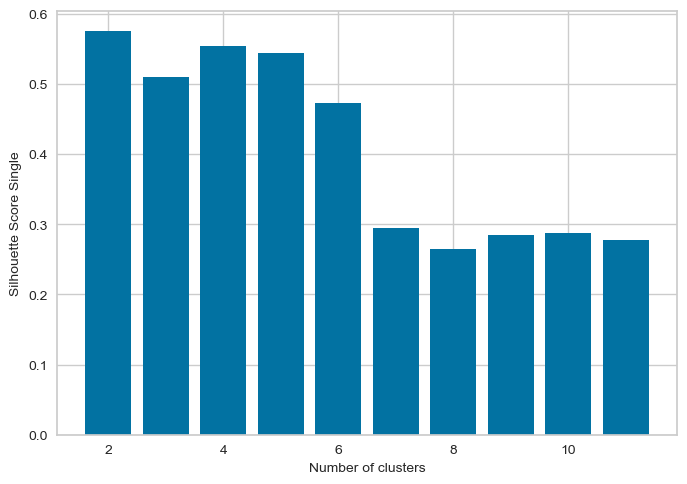

0.5747525444461342


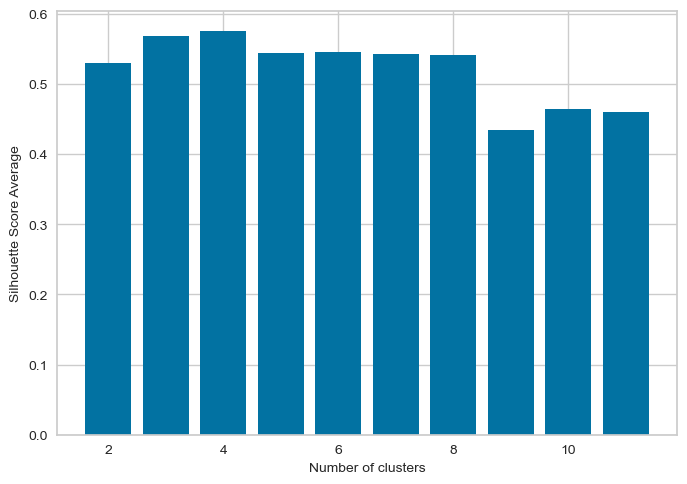

0.5747638055086319


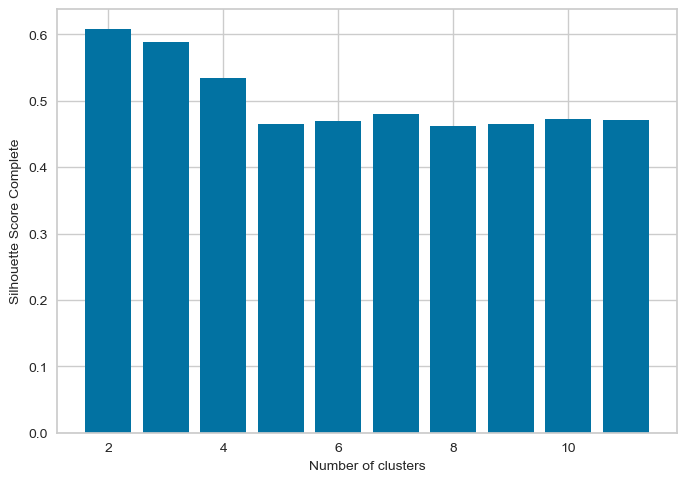

0.6074869825195351


In [38]:
cluster_range = range(2, 12)
ss_w = []
ss_s = []
ss_a = []
ss_c = []

for i in cluster_range:
    acP13w = AgglomerativeClustering(n_clusters=i, linkage="ward")
    ss_w.append(silhouette_score(data_var_P13, acP13w.fit_predict(data_var_P13)))

plt.bar(cluster_range, ss_w) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score Ward', fontsize = 10)
plt.show()
print(max(ss_w))

# Optimal number of clusters for single linkage method
for i in cluster_range:
    acP13s = AgglomerativeClustering(n_clusters=i, linkage="single")
    ss_s.append(silhouette_score(data_var_P13, acP13s.fit_predict(data_var_P13)))

plt.bar(cluster_range, ss_s) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score Single', fontsize = 10)
plt.show()
print(max(ss_s))

# Optimal number of clusters for average linkage
for i in cluster_range:
    acP13a = AgglomerativeClustering(n_clusters=i, linkage="average")
    ss_a.append(silhouette_score(data_var_P13, acP13a.fit_predict(data_var_P13)))

plt.bar(cluster_range, ss_a) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score Average', fontsize = 10)
plt.show()
print(max(ss_a))

# Optimal number of clusters for complete linkage
for i in cluster_range:
    acP13c = AgglomerativeClustering(n_clusters=i, linkage="complete")
    ss_c.append(silhouette_score(data_var_P13, acP13c.fit_predict(data_var_P13)))

plt.bar(cluster_range, ss_c) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score Complete', fontsize = 10)
plt.show()
print(max(ss_c))

From the above graphs, the optimal number of clusters is 2 for all linkage except for Average with 4. The highest silhouette score(cluster quality) is Ward linkage (0.6077637763317943).

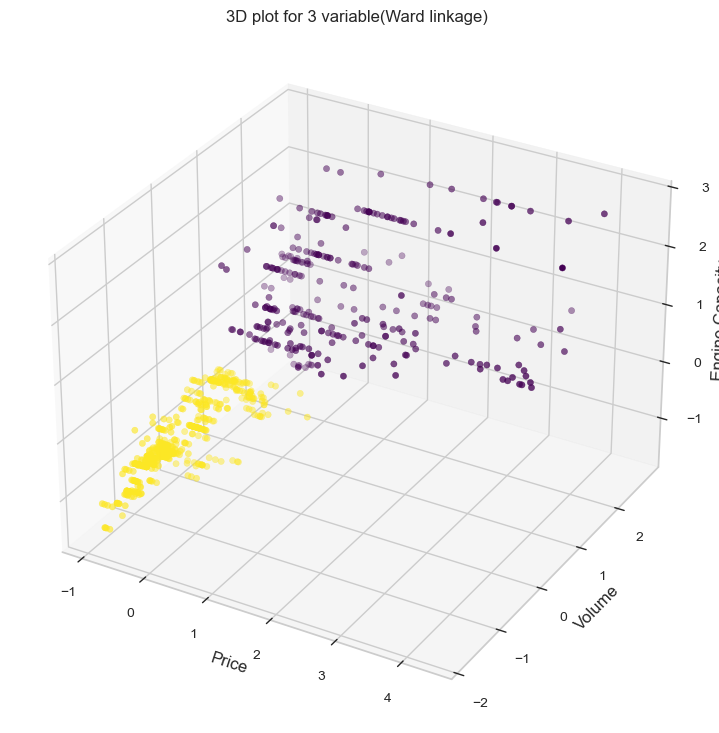

In [39]:
plt.figure(figsize=(9,9))
ax = plt.axes(projection='3d')
ac_P13var_w = AgglomerativeClustering(n_clusters=2, linkage="ward")
ac_P13var_w.fit_predict(data_var_P13)
ax.scatter3D(data_var_P13[:,0], data_var_P13[:,1], 
             data_var_P13[:,2], c=ac_P13var_w.fit_predict(data_var_P13), 
             cmap = 'viridis')
ax.set_title('3D plot for 3 variable(Ward linkage)')
ax.set_xlabel('Price')
ax.set_ylabel('Volume')
ax.set_zlabel('Engine Capacity')
plt.show()


Box-plot for 3 variable using Ward linkage
PRICE


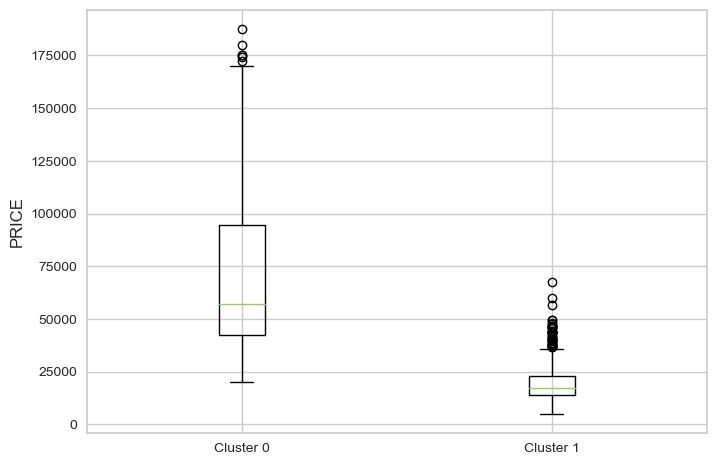

VOLUME(m2)


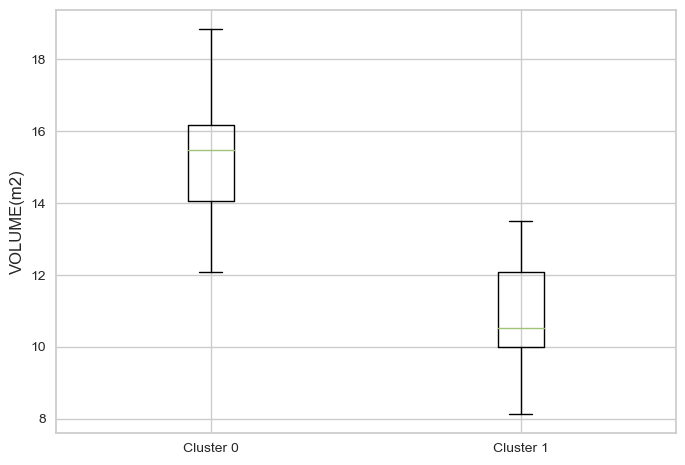

ENGINE CAPACITY 


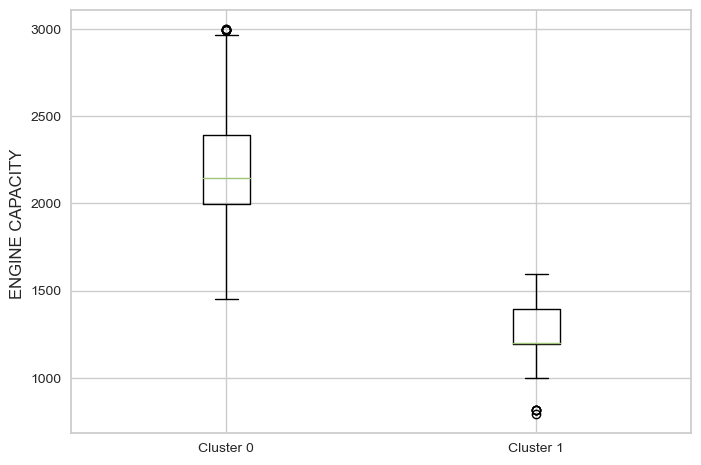

In [40]:
HC_bp_data_var_P13 = pd.DataFrame(data_oriP1[:, [0, 5, 3]], columns=['PRICE', 'VOLUME(m2)', 'ENGINE CAPACITY '])
HC_bp_data_var_P13['Cluster'] = ac_P13var_w.fit_predict(data_var_P13)
print('Box-plot for 3 variable using Ward linkage')
for col in range(len(HC_bp_data_var_P13.columns) - 1):
    print(HC_bp_data_var_P13.columns[col])
    plt.cla()
    plt.boxplot([HC_bp_data_var_P13.iloc[:, col][HC_bp_data_var_P13.Cluster == 0].tolist(),
                 HC_bp_data_var_P13.iloc[:, col][HC_bp_data_var_P13.Cluster == 1].tolist(), ],
                 labels=('Cluster 0', 'Cluster 1'))
    plt.ylabel(HC_bp_data_var_P13.columns[col])
    plt.show()

###  Hierarchical Clustering for 4 variable

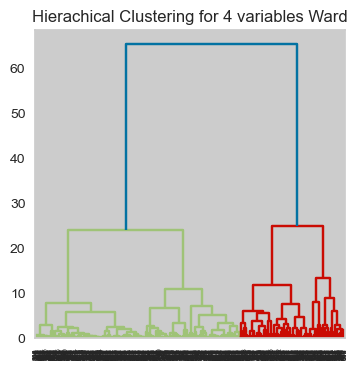

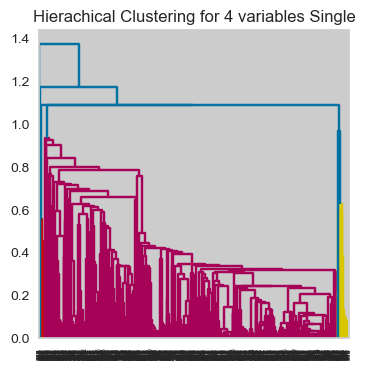

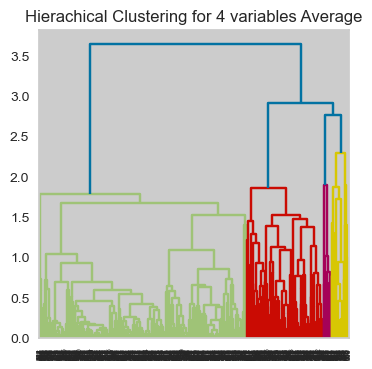

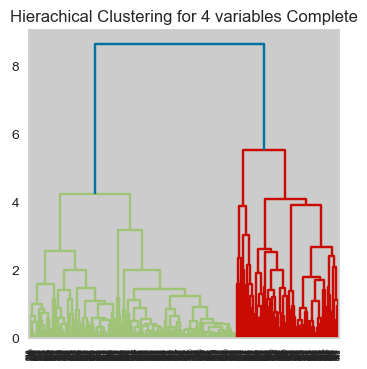

In [41]:
HClust_P14var = shc.linkage(data_var_P14, method='ward')
plt.figure(figsize=(4, 4))
plt.title('Hierachical Clustering for 4 variables Ward')
Dendrogram = shc.dendrogram(HClust_P14var)

HClust_P14var = shc.linkage(data_var_P14, method='single')
plt.figure(figsize=(4, 4))
plt.title('Hierachical Clustering for 4 variables Single')
Dendrogram = shc.dendrogram(HClust_P14var)

HClust_P14var = shc.linkage(data_var_P14, method='average')
plt.figure(figsize=(4, 4))
plt.title('Hierachical Clustering for 4 variables Average')
Dendrogram = shc.dendrogram(HClust_P14var)

HClust_P14var = shc.linkage(data_var_P14, method='complete')
plt.figure(figsize=(4, 4))
plt.title('Hierachical Clustering for 4 variables Complete')
Dendrogram = shc.dendrogram(HClust_P14var)

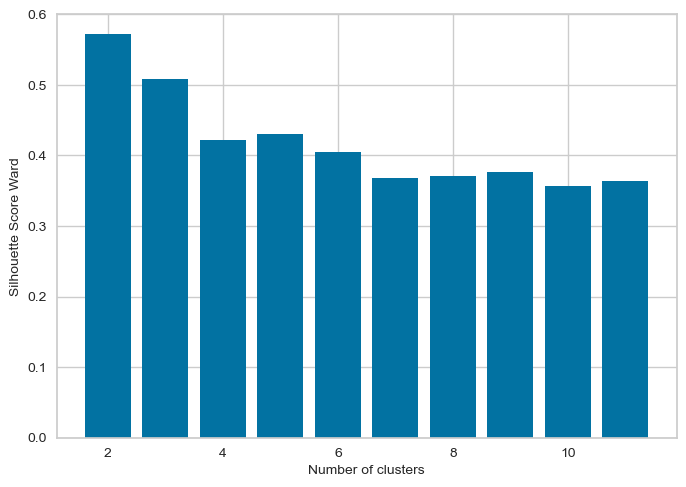

0.571469354544218


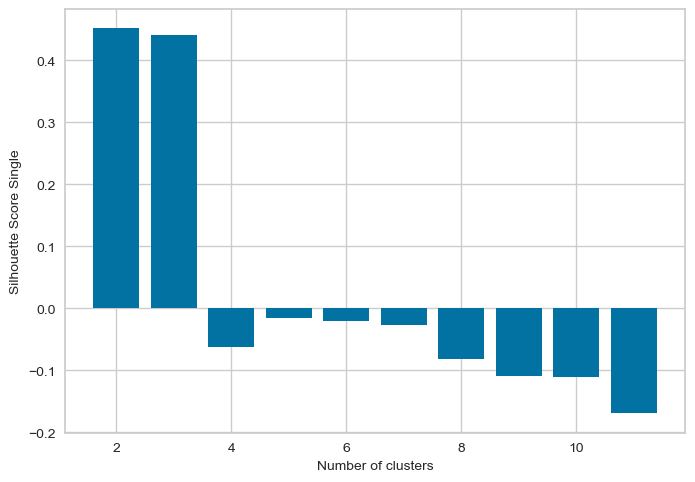

0.45167065348001384


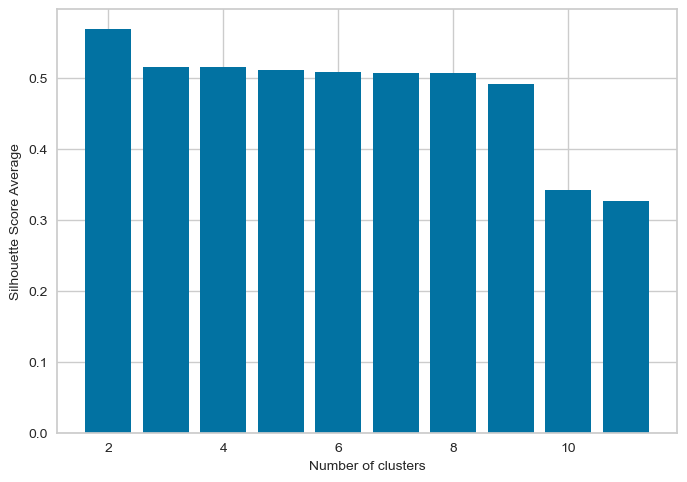

0.5688429374165793


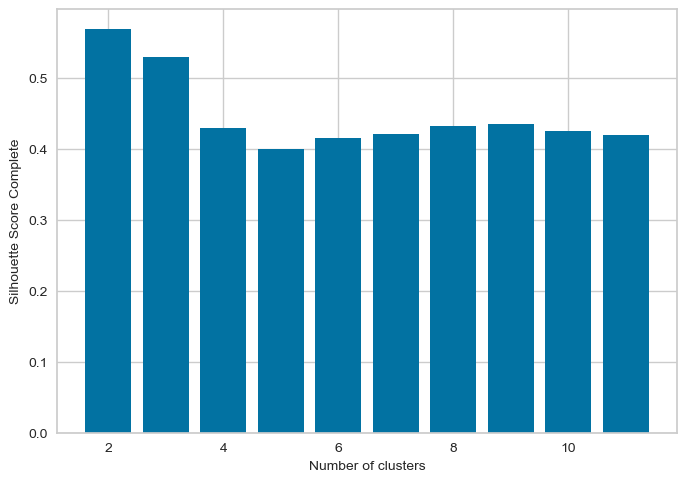

0.5688429374165793


In [42]:
cluster_range = range(2, 12)
ss_w = []
ss_s = []
ss_a = []
ss_c = []

for i in cluster_range:
    acP14w = AgglomerativeClustering(n_clusters=i, linkage="ward")
    ss_w.append(silhouette_score(data_var_P14, acP14w.fit_predict(data_var_P14)))

plt.bar(cluster_range, ss_w) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score Ward', fontsize = 10)
plt.show()
print(max(ss_w))

# Optimal number of clusters for single linkage method
for i in cluster_range:
    acP14s = AgglomerativeClustering(n_clusters=i, linkage="single")
    ss_s.append(silhouette_score(data_var_P14, acP14s.fit_predict(data_var_P14)))

plt.bar(cluster_range, ss_s) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score Single', fontsize = 10)
plt.show()
print(max(ss_s))

# Optimal number of clusters for average linkage
for i in cluster_range:
    acP14a = AgglomerativeClustering(n_clusters=i, linkage="average")
    ss_a.append(silhouette_score(data_var_P14, acP14a.fit_predict(data_var_P14)))

plt.bar(cluster_range, ss_a) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score Average', fontsize = 10)
plt.show()
print(max(ss_a))

# Optimal number of clusters for complete linkage
for i in cluster_range:
    acP14c = AgglomerativeClustering(n_clusters=i, linkage="complete")
    ss_c.append(silhouette_score(data_var_P14, acP14c.fit_predict(data_var_P14)))

plt.bar(cluster_range, ss_c) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score Complete', fontsize = 10)
plt.show()
print(max(ss_c))

From the above graphs, the optimal number of clusters is 2 for all linkage. The highest silhouette score(cluster quality) is Ward linkage (0.571469354544218).

Box-plot for 4 variable using Ward linkage


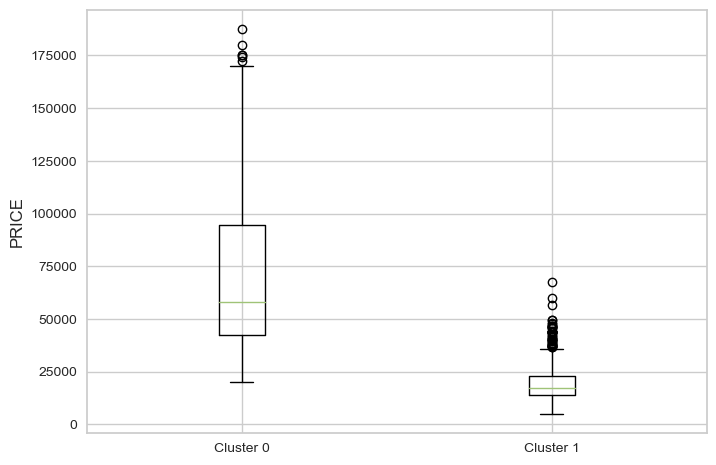

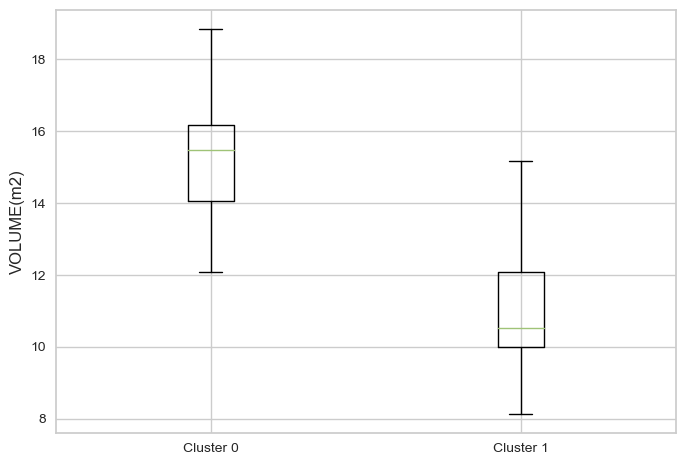

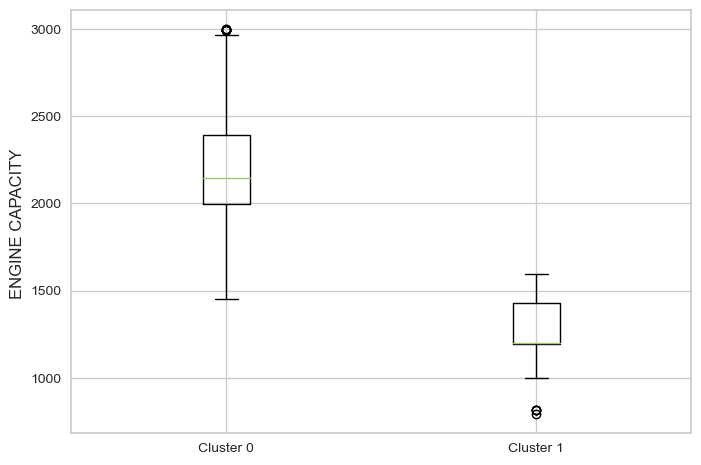

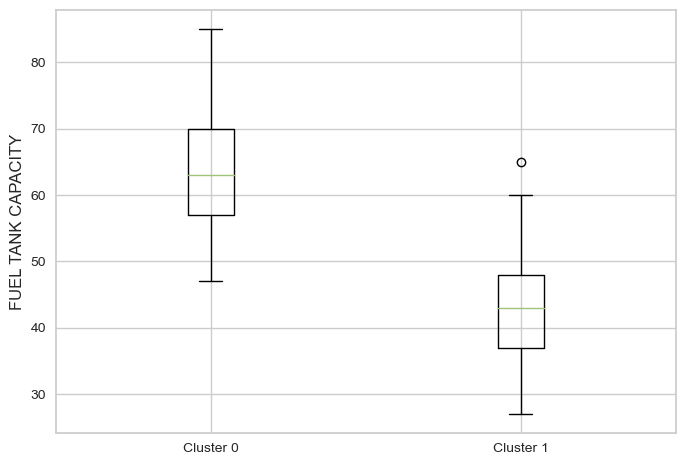

In [43]:
ac_P14var_w = AgglomerativeClustering(n_clusters=2, linkage="ward")
HC_bp_data_var_P14 = pd.DataFrame(data_oriP1[:, [0, 5, 3, 4]], columns=['PRICE', 'VOLUME(m2)', 'ENGINE CAPACITY ',
                                                                        'FUEL TANK CAPACITY'])
HC_bp_data_var_P14['Cluster'] = ac_P14var_w.fit_predict(data_var_P14)
print('Box-plot for 4 variable using Ward linkage')
for col in range(len(HC_bp_data_var_P14.columns) - 1):
    HC_bp_data_var_P14.columns[col]
    plt.cla()
    plt.boxplot([HC_bp_data_var_P14.iloc[:, col][HC_bp_data_var_P14.Cluster == 0].tolist(),
                 HC_bp_data_var_P14.iloc[:, col][HC_bp_data_var_P14.Cluster == 1].tolist(), ],
                 labels=('Cluster 0', 'Cluster 1'))
    plt.ylabel(HC_bp_data_var_P14.columns[col])
    plt.show()

###  Hierarchical Clustering for 5 variable

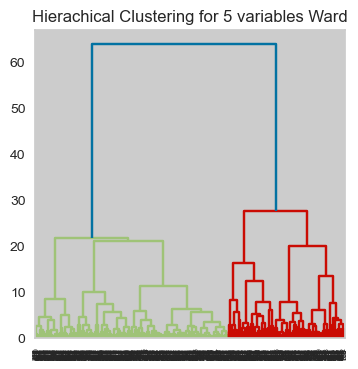

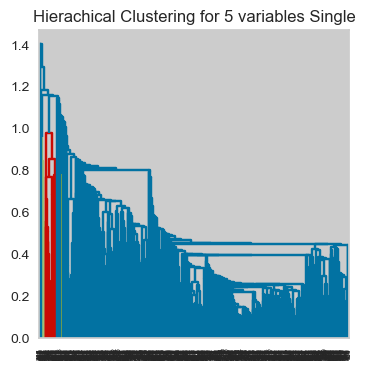

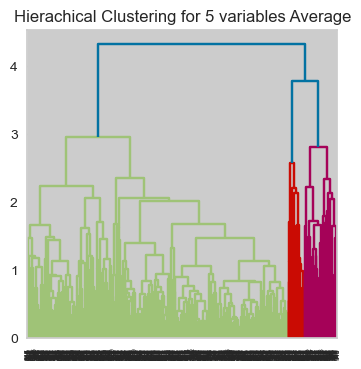

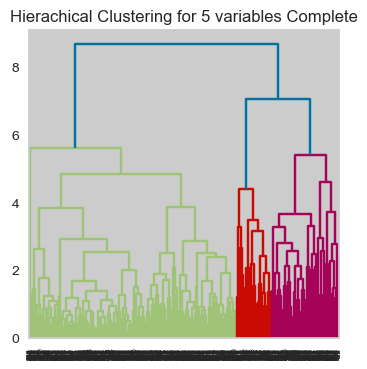

In [44]:
HClust_P15var = shc.linkage(data_var_P15, method='ward')
plt.figure(figsize=(4, 4))
plt.title('Hierachical Clustering for 5 variables Ward')
Dendrogram = shc.dendrogram(HClust_P15var)

HClust_P15var = shc.linkage(data_var_P15, method='single')
plt.figure(figsize=(4, 4))
plt.title('Hierachical Clustering for 5 variables Single')
Dendrogram = shc.dendrogram(HClust_P15var)

HClust_P15var = shc.linkage(data_var_P15, method='average')
plt.figure(figsize=(4, 4))
plt.title('Hierachical Clustering for 5 variables Average')
Dendrogram = shc.dendrogram(HClust_P15var)

HClust_P15var = shc.linkage(data_var_P15, method='complete')
plt.figure(figsize=(4, 4))
plt.title('Hierachical Clustering for 5 variables Complete')
Dendrogram = shc.dendrogram(HClust_P15var)

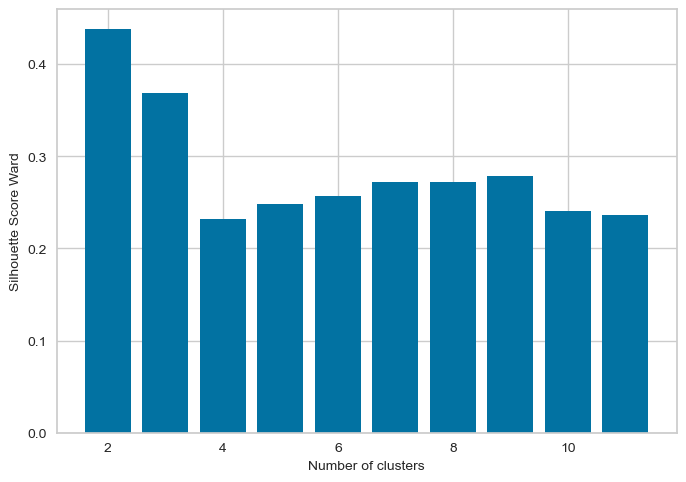

0.4377502665998246


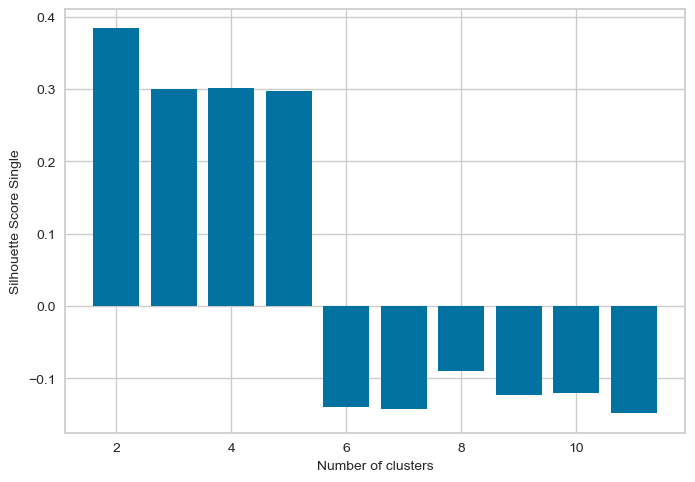

0.3838926837189347


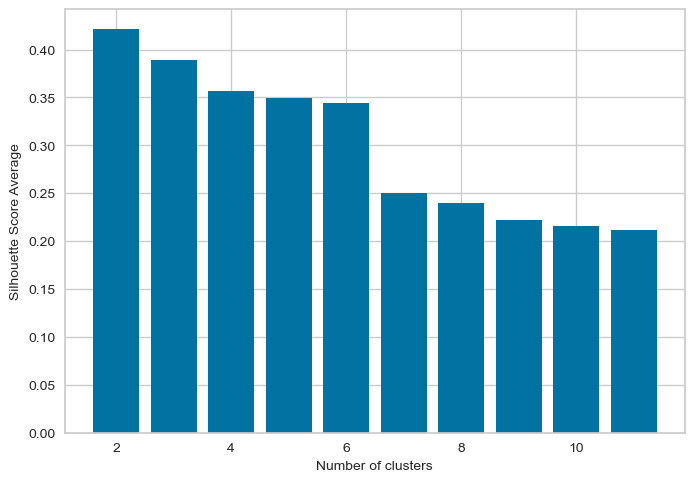

0.420998308528399


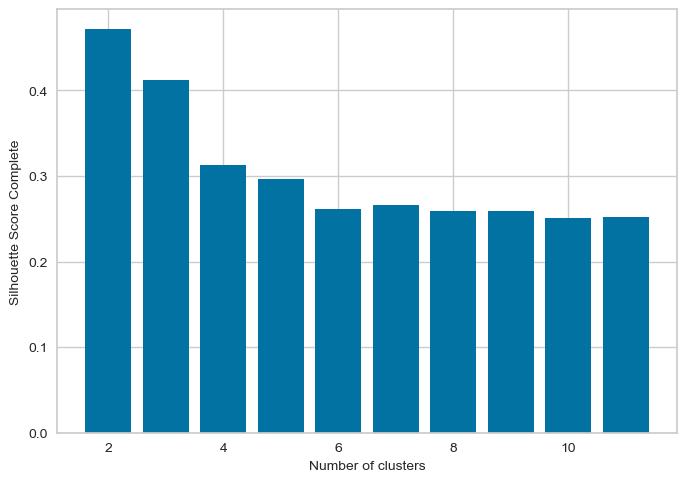

0.4711426145784816


In [45]:
cluster_range = range(2, 12)
ss_w = []
ss_s = []
ss_a = []
ss_c = []

for i in cluster_range:
    acP15w = AgglomerativeClustering(n_clusters=i, linkage="ward")
    ss_w.append(silhouette_score(data_var_P15, acP15w.fit_predict(data_var_P15)))

plt.bar(cluster_range, ss_w) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score Ward', fontsize = 10)
plt.show()
print(max(ss_w))

# Optimal number of clusters for single linkage method
for i in cluster_range:
    acP15s = AgglomerativeClustering(n_clusters=i, linkage="single")
    ss_s.append(silhouette_score(data_var_P15, acP15s.fit_predict(data_var_P15)))

plt.bar(cluster_range, ss_s) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score Single', fontsize = 10)
plt.show()
print(max(ss_s))

# Optimal number of clusters for average linkage
for i in cluster_range:
    acP15a = AgglomerativeClustering(n_clusters=i, linkage="average")
    ss_a.append(silhouette_score(data_var_P15, acP15a.fit_predict(data_var_P15)))

plt.bar(cluster_range, ss_a) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score Average', fontsize = 10)
plt.show()
print(max(ss_a))

# Optimal number of clusters for complete linkage
for i in cluster_range:
    acP15c = AgglomerativeClustering(n_clusters=i, linkage="complete")
    ss_c.append(silhouette_score(data_var_P15, acP15c.fit_predict(data_var_P15)))

plt.bar(cluster_range, ss_c) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score Complete', fontsize = 10)
plt.show()
print(max(ss_c))

From the above graphs, the optimal number of clusters is 2 for all linkage. The highest silhoutte score(cluster quality) is Complete linkage (0.4711426145784816).

Box-plot for 5 variable using Complete linkage


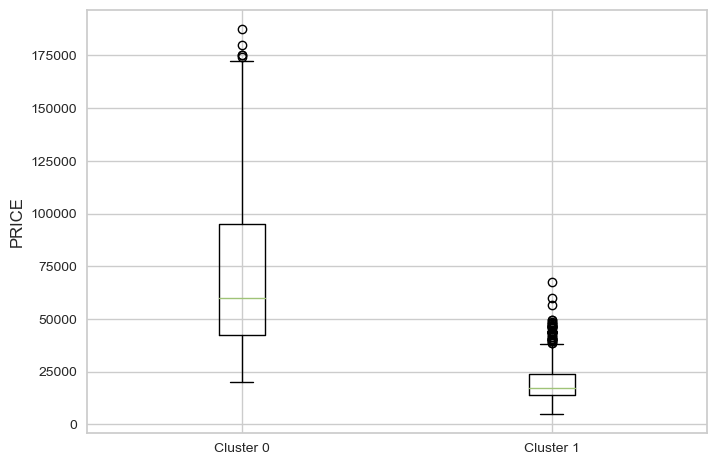

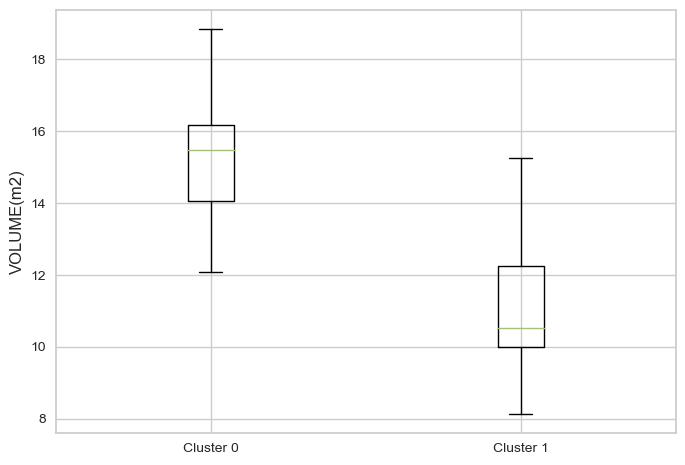

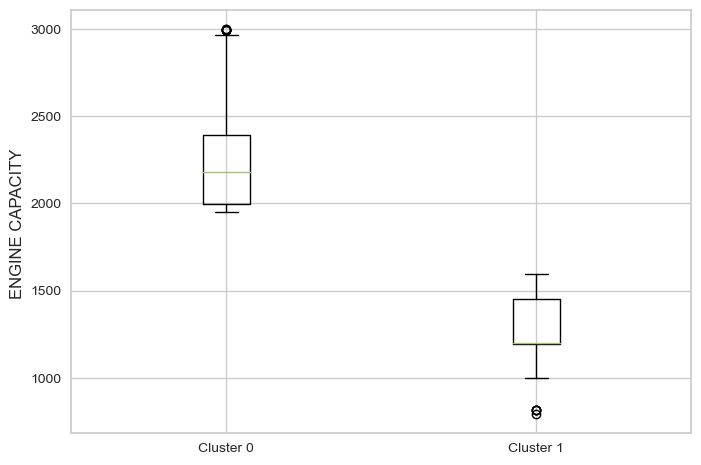

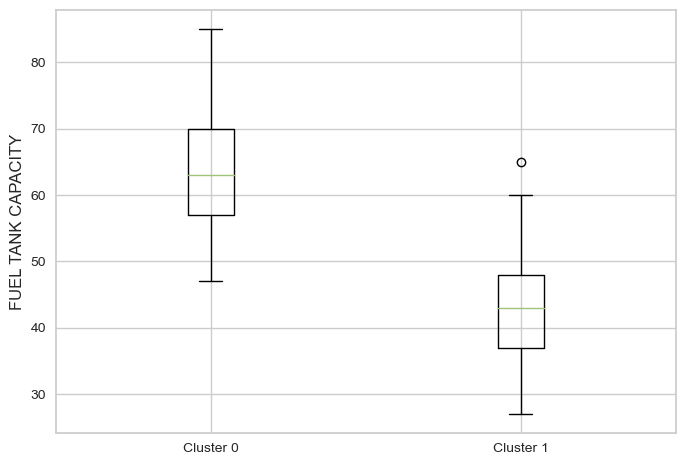

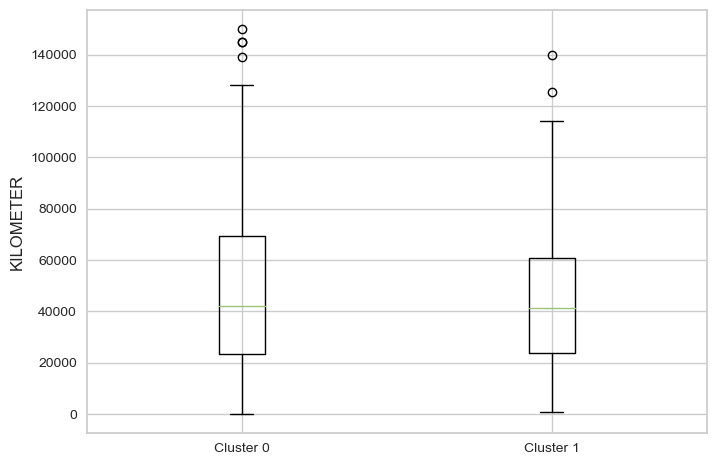

In [46]:
ac_P15var_c = AgglomerativeClustering(n_clusters=2, linkage="complete")
HC_bp_data_var_P15 = pd.DataFrame(data_oriP1[:, [0, 5, 3, 4, 2]], 
                                  columns=['PRICE', 'VOLUME(m2)', 'ENGINE CAPACITY ', 
                                           'FUEL TANK CAPACITY', 'KILOMETER'])
HC_bp_data_var_P15['Cluster'] = ac_P15var_c.fit_predict(data_var_P15)
print('Box-plot for 5 variable using Complete linkage')
for col in range(len(HC_bp_data_var_P15.columns) - 1):
    HC_bp_data_var_P15.columns[col]
    plt.cla()
    plt.boxplot([HC_bp_data_var_P15.iloc[:, col][HC_bp_data_var_P15.Cluster == 0].tolist(),
                 HC_bp_data_var_P15.iloc[:, col][HC_bp_data_var_P15.Cluster == 1].tolist(), ],
                 labels=('Cluster 0', 'Cluster 1'))
    plt.ylabel(HC_bp_data_var_P15.columns[col])
    plt.show()